In [5]:
pip install pandas openpyxl xlrd

     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


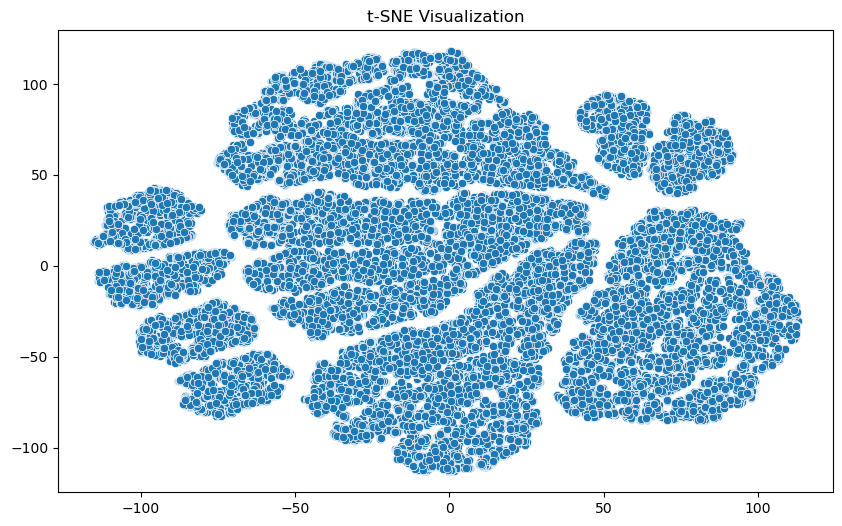

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")
# Data Preprocessing
# Assuming 'City', 'Company', and 'Month' columns are categorical and need encoding
df_encoded = pd.get_dummies(df, columns=['City', 'Company', 'Month'])

# Scaling numerical features
numerical_features = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 
                      'MonthlyHours', 'TariffRate', 'ElectricityBill']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Nonlinear and Distance-Based Dimensionality Reduction (t-SNE)
features_for_tsne = df_scaled.columns
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled[features_for_tsne])

# Visualize the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('t-SNE Visualization')
plt.show()

C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_17812\929882091.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral'),


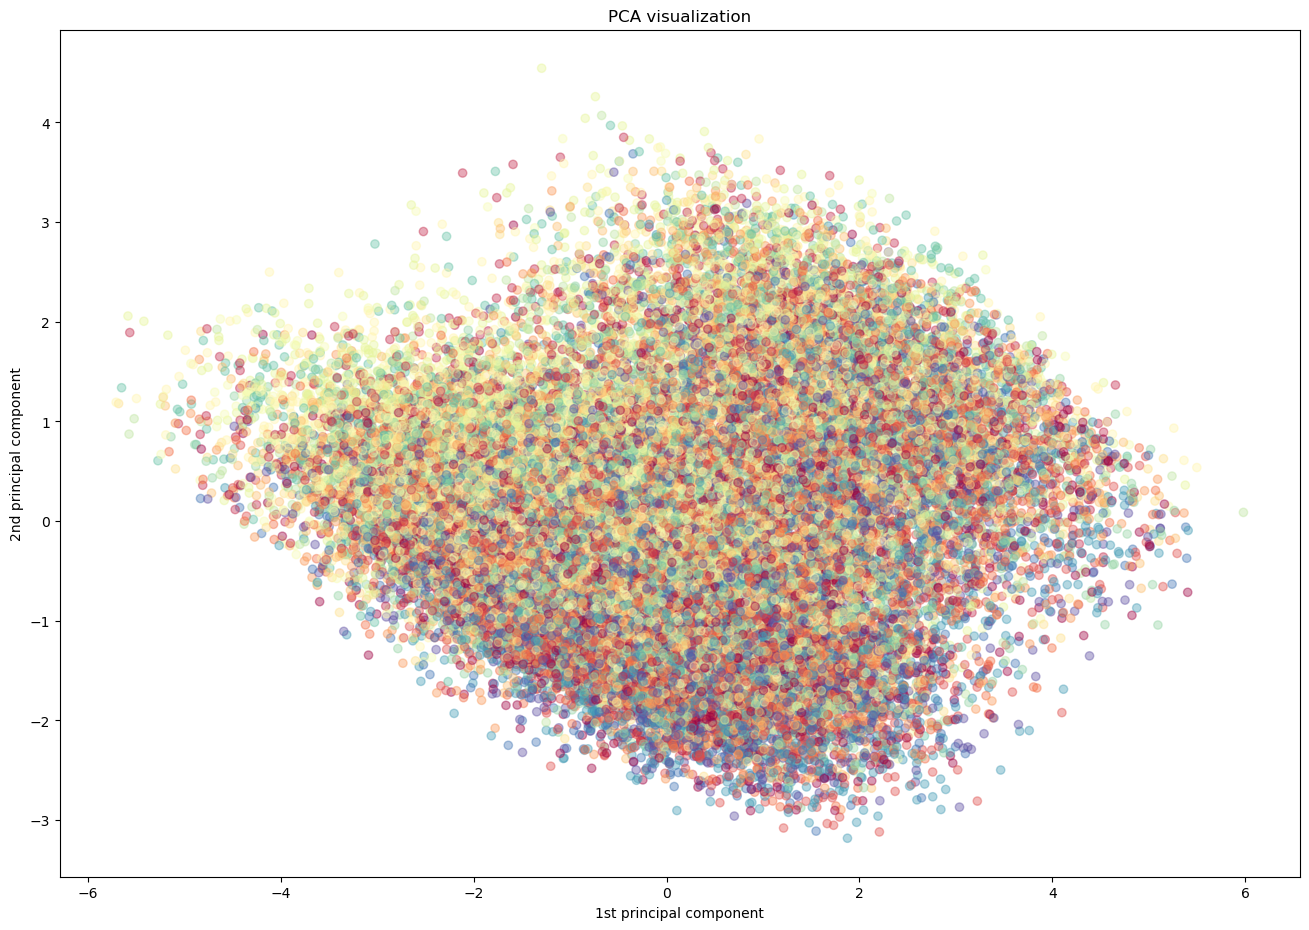

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['City', 'Company']
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=2))
])

# Apply the pipeline
pca_results = pca_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=pca_results[:, 0],
    y=pca_results[:, 1],
    c=df['City'].astype('category').cat.codes,  # Assuming 'City' is the class column
    cmap=plt.cm.get_cmap('Spectral'),
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()


C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_17812\364001996.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


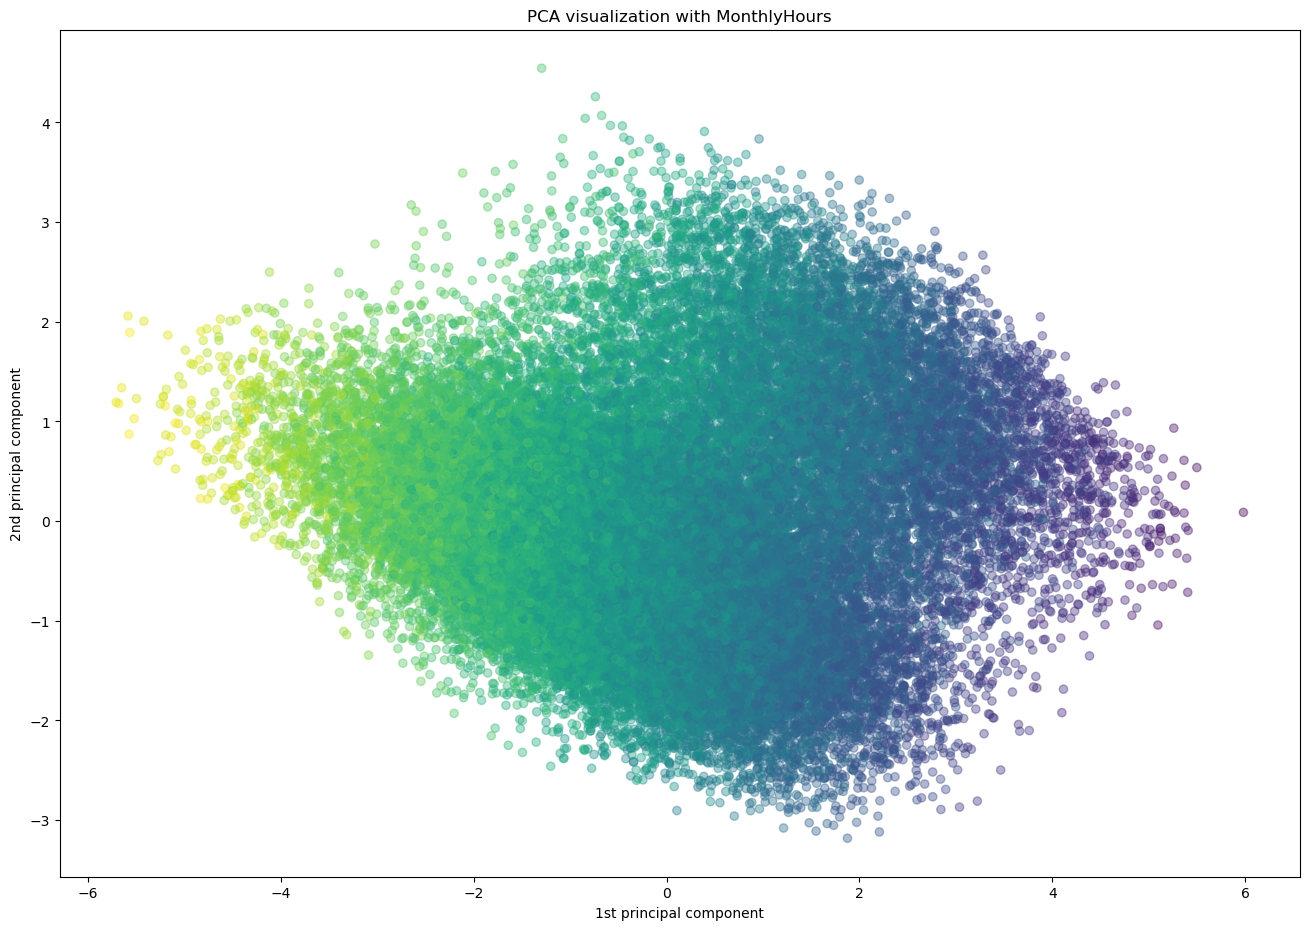

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['City', 'Company']
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=2))
])

# Apply the pipeline
pca_results = pca_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=pca_results[:, 0],
    y=pca_results[:, 1],
    c=df['MonthlyHours'],  # Use 'MonthlyHours' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="MonthlyHours", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization with MonthlyHours")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()


# Feel free to replace 'AirConditioner' and 'Fan' with other variables based on your dataset and analysis goals.

C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_17812\3260499253.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


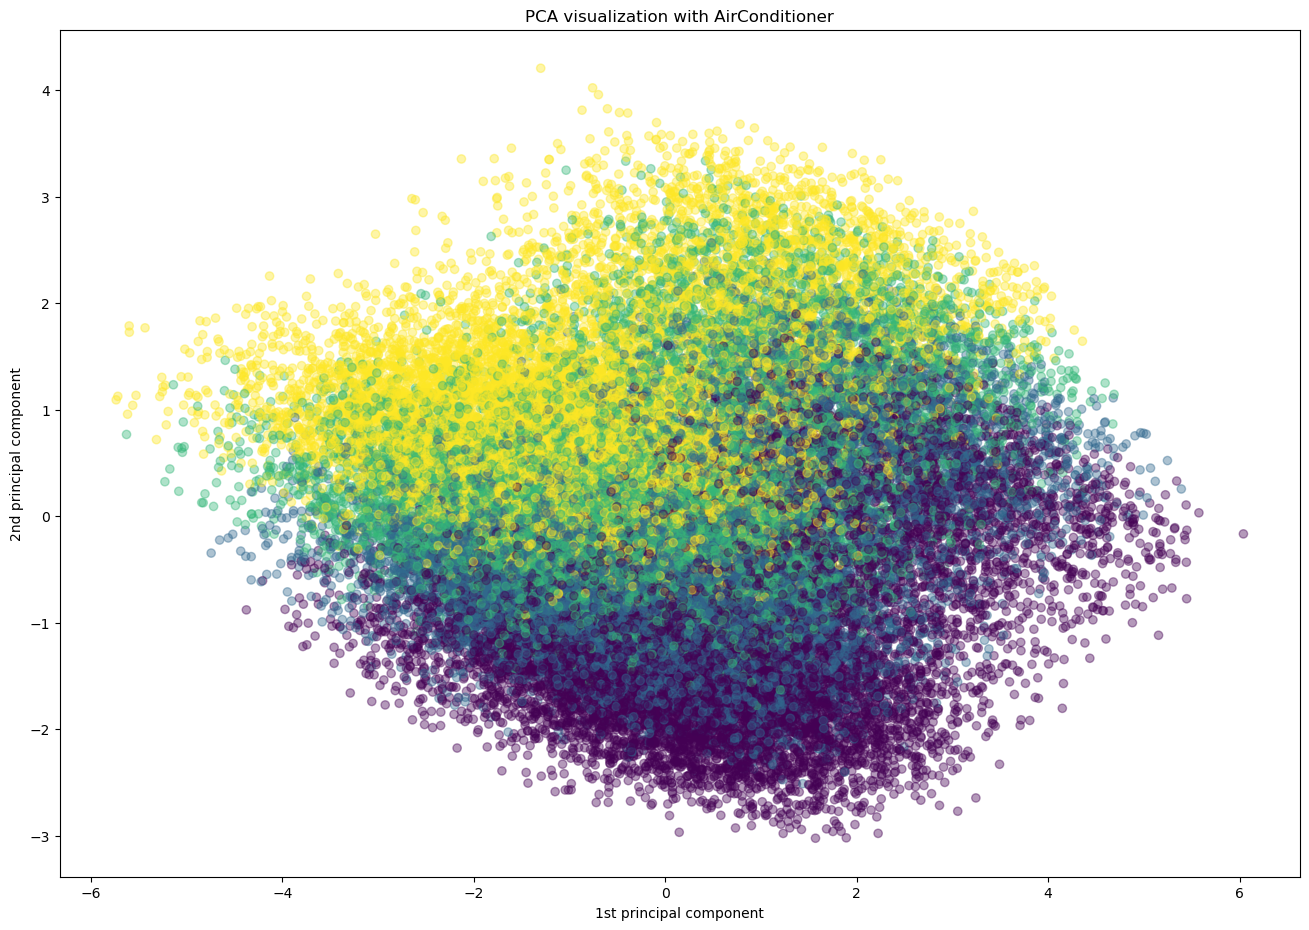

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['AirConditioner', 'Fan']  # Replace 'City' and 'Company' with other variables
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=2))
])

# Apply the pipeline
pca_results = pca_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=pca_results[:, 0],
    y=pca_results[:, 1],
    c=df['AirConditioner'],  # Use 'AirConditioner' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="AirConditioner", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization with AirConditioner")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()


C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_17812\1650398067.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


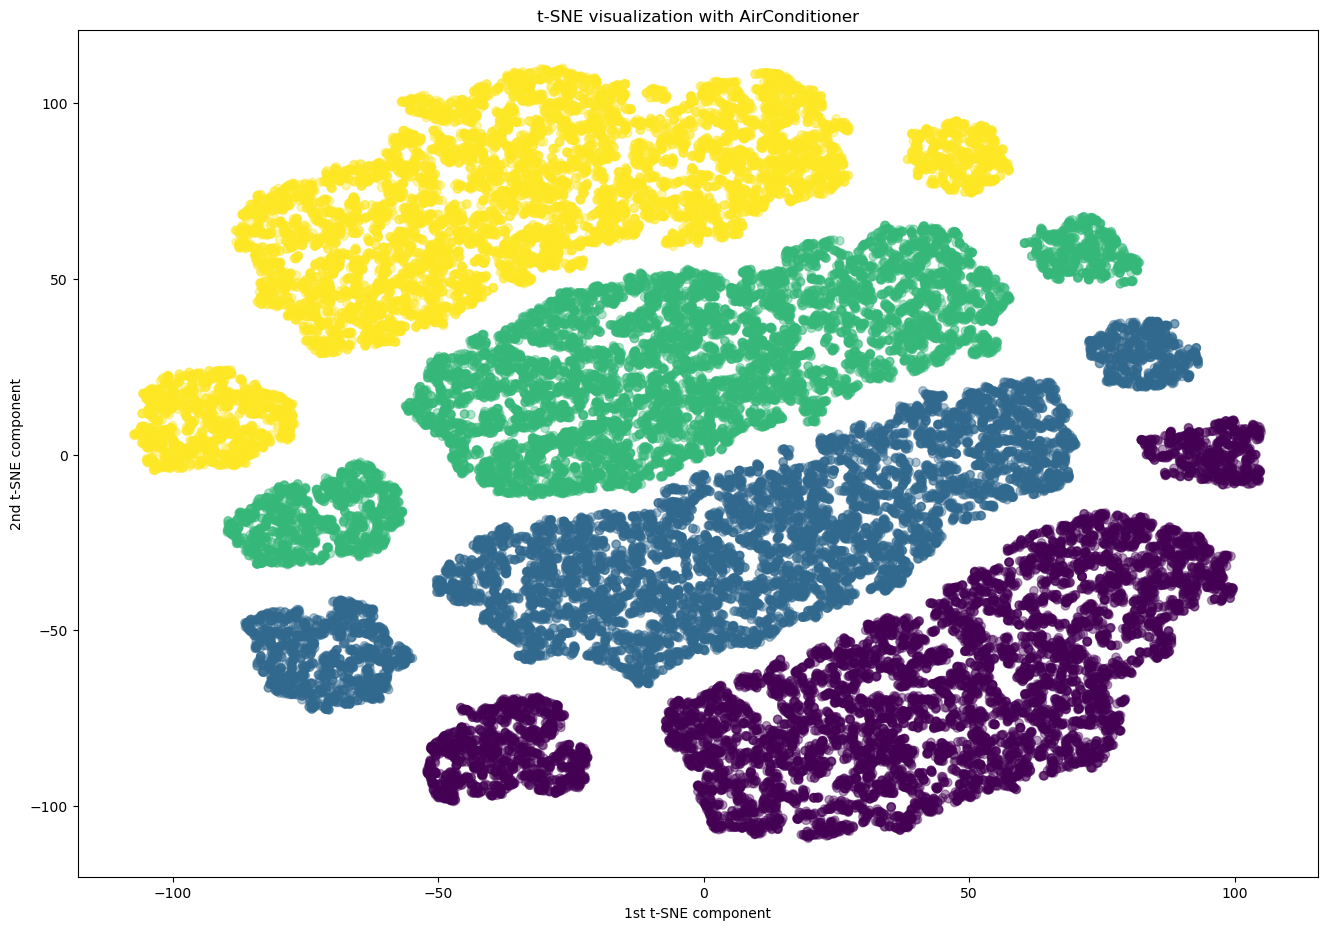

In [15]:
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['AirConditioner', 'Fan']  # Replace 'City' and 'Company' with other variables
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
tsne_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=10)),  # Use a value less than or equal to the number of features
    ('2d_reduction', TSNE(n_components=2, init='pca', random_state=42))
])

# Apply the pipeline
tsne_results = tsne_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=df['AirConditioner'],  # Use 'AirConditioner' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="AirConditioner", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization with AirConditioner")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()


C:\Users\Sowmya\AppData\Local\Temp\ipykernel_17812\1185209378.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


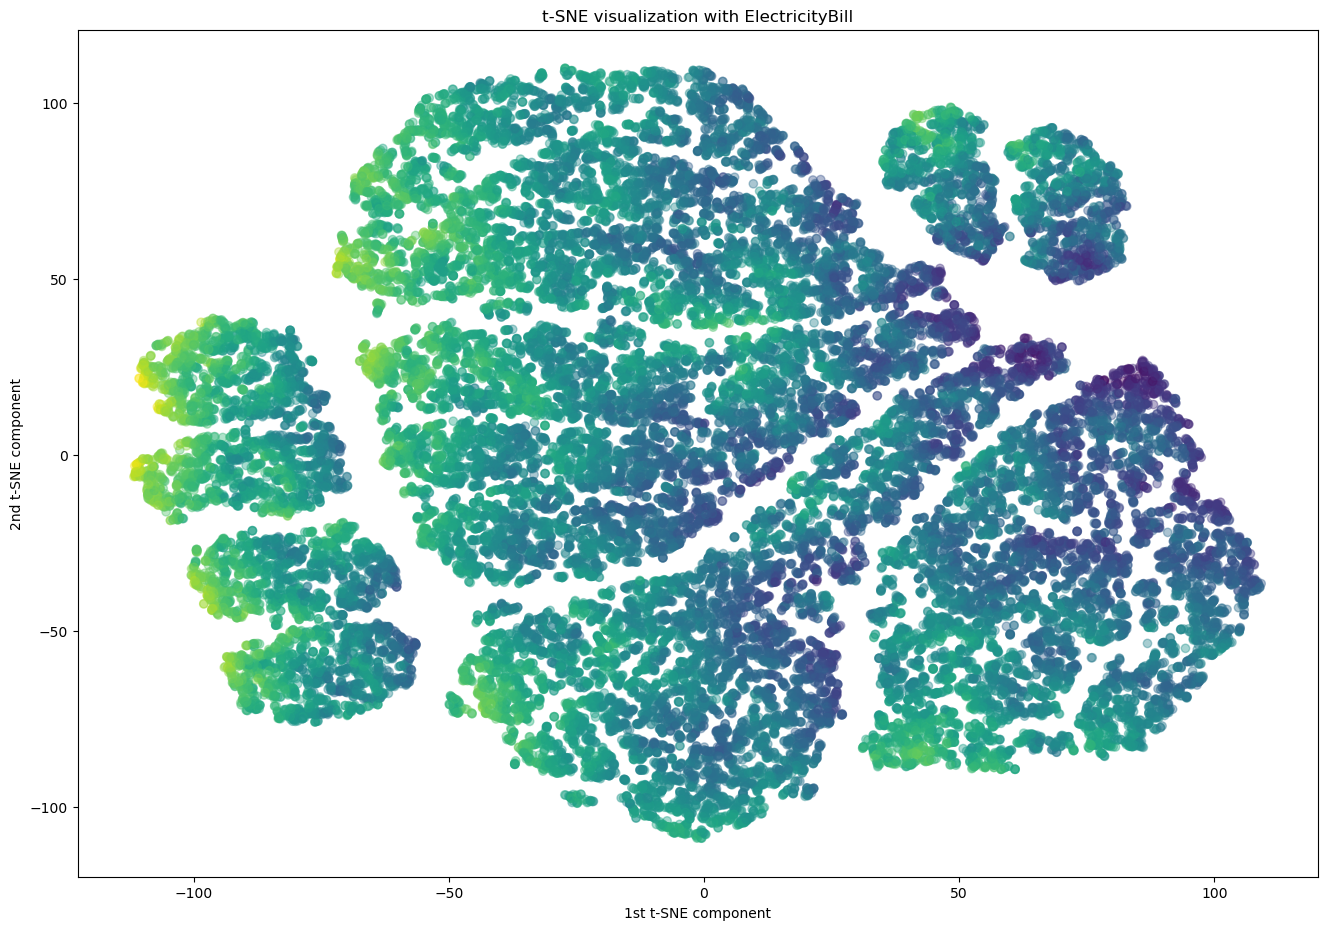

In [18]:
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['Month', 'City', 'Company']  # Add or remove categorical columns as needed
numeric_cols = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate', 'ElectricityBill']

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Create the pipeline
tsne_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', TruncatedSVD(n_components=10)),  # Use TruncatedSVD instead of PCA
    ('2d_reduction', TSNE(n_components=2, init='pca', random_state=42))
])

# Apply the pipeline
tsne_results = tsne_pipeline.fit_transform(df)

# Normalize 'ElectricityBill' for better visualization
normalized_electricity_bill = (df['ElectricityBill'] - df['ElectricityBill'].min()) / (df['ElectricityBill'].max() - df['ElectricityBill'].min())

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=normalized_electricity_bill,  # Use normalized 'ElectricityBill' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="ElectricityBill", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization with ElectricityBill")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()
